# Statics

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

In [2]:
tod = pd.read_csv('./Data/smartphones.csv')

In [3]:
tod.head()

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S10,Android,128,8,163.0,Samsung,6.2
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia 1 ll,Android,256,8,181.0,Sony,6.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7


In [4]:
count = tod.Ram.value_counts()
count

4    3
8    2
3    2
2    2
Name: Ram, dtype: int64

In [5]:
tod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9 non-null      object 
 1   OS        9 non-null      object 
 2   Capacity  9 non-null      int64  
 3   Ram       9 non-null      int64  
 4   Weight    9 non-null      float64
 5   Company   9 non-null      object 
 6   inch      9 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 632.0+ bytes


In [6]:
catagory = count.index
catagory

Int64Index([4, 8, 3, 2], dtype='int64')

([<matplotlib.axis.XTick at 0x26241dc2e20>,
 <a list of 4 Text major ticklabel objects>)

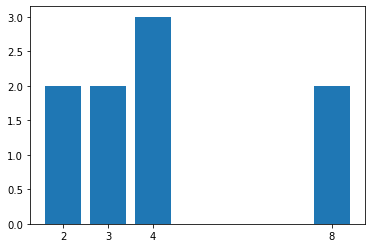

In [7]:
plt.bar(catagory,count)
plt.xticks([2,3,4,8])

In [8]:
# shwo ECDF in graph
def ECDF(data):
    n= len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y
x,y = ECDF(tod.inch)
x
y

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ])

In [9]:
# Get the percentaile or Charak or quater(25%,50%,75%)
np.percentile(tod.inch,[25,50,75])

array([5. , 5.2, 6.2])

## Varians

In [10]:
np.var(tod.inch)

0.4335802469135802

In [11]:
np.std(tod.inch)

0.6584681062235135

# Coveriance


Text(0, 0.5, 'wight of Phone')

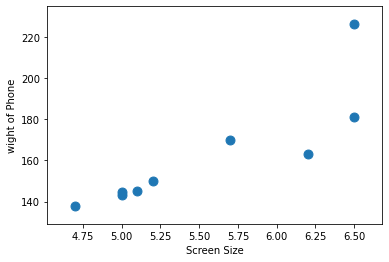

In [12]:
plt.scatter(tod.inch,tod.Weight,s=80)
plt.margins(0.1)
plt.xlabel("Screen Size")
plt.ylabel("wight of Phone")

In [13]:
np.cov(tod.inch,tod.Weight)

array([[4.87777778e-01, 1.66298611e+01],
       [1.66298611e+01, 7.74694444e+02]])

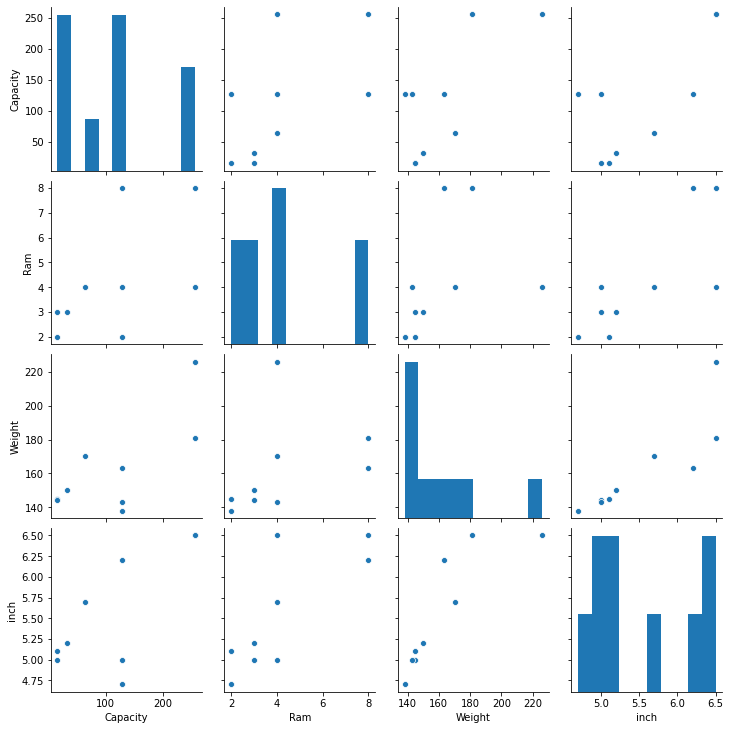

In [14]:
sb.pairplot(tod)

In [15]:
pearsonr(tod.inch,tod.Weight)

(0.8554849938477145, 0.003270259823544862)

In [16]:
tot = tod.copy()

In [17]:
tot.head()

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S10,Android,128,8,163.0,Samsung,6.2
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia 1 ll,Android,256,8,181.0,Sony,6.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7


In [21]:
CO=tot.drop(['Name','OS','Capacity','Ram','Company'],axis=1)

In [22]:
cor=CO.corr()

In [24]:
cor

,Weight,inch
Weight,1.000000,0.855485
inch,0.855485,1.000000


## Hitmap graph

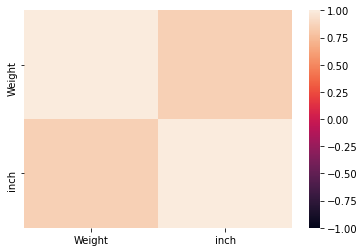

In [28]:
sb.heatmap(cor,xticklabels=CO.columns,yticklabels=CO.columns,vmin=-1,vmax=1)